In [98]:
import pandas as pd
import numpy as np

In [99]:
Sales = pd.read_excel('ECOMM DATA.xlsx')
Sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [100]:
# List of columns to keep for sales analysis
columns_to_keep = ['Order Date', 'Sales', 'Quantity', 'Discount', 'Profit', 'Product ID', 'Category', 'Sub-Category', 'Customer ID']

# Remove other columns
Sales = Sales[columns_to_keep]


In [101]:
Sales.head()

,Order Date,Sales,Quantity,Discount,Profit,Product ID,Category,Sub-Category,Customer ID
0,2012-07-31,2309.650,7,0.0,762.1845,TEC-AC-10003033,Technology,Accessories,RH-19495
1,2013-02-05,3709.395,9,0.1,-288.7650,FUR-CH-10003950,Furniture,Chairs,JR-16210
2,2013-10-17,5175.171,9,0.1,919.9710,TEC-PH-10004664,Technology,Phones,CR-12730
3,2013-01-28,2892.510,5,0.1,-96.5400,TEC-PH-10004583,Technology,Phones,KM-16375
4,2013-11-05,2832.960,8,0.0,311.5200,TEC-SHA-10000501,Technology,Copiers,RH-9495


In [102]:
last_four_columns = Sales.iloc[:, -4:]
print(last_four_columns)


             Product ID         Category Sub-Category Customer ID
0       TEC-AC-10003033       Technology  Accessories    RH-19495
1       FUR-CH-10003950        Furniture       Chairs    JR-16210
2       TEC-PH-10004664       Technology       Phones    CR-12730
3       TEC-PH-10004583       Technology       Phones    KM-16375
4      TEC-SHA-10000501       Technology      Copiers     RH-9495
...                 ...              ...          ...         ...
51285   OFF-FA-10000746  Office Supplies    Fasteners    KE-16420
51286   OFF-AP-10002906  Office Supplies   Appliances    ZC-21910
51287   OFF-EN-10001219  Office Supplies    Envelopes    LB-16795
51288   OFF-BI-10000806  Office Supplies      Binders    RB-19795
51289   OFF-PA-10004155  Office Supplies        Paper    MC-18100

[51290 rows x 4 columns]


In [103]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    51290 non-null  datetime64[ns]
 1   Sales         51290 non-null  float64       
 2   Quantity      51290 non-null  int64         
 3   Discount      51290 non-null  float64       
 4   Profit        51290 non-null  float64       
 5   Product ID    51290 non-null  object        
 6   Category      51290 non-null  object        
 7   Sub-Category  51290 non-null  object        
 8   Customer ID   51290 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 3.5+ MB


In [104]:
Sales.describe()

,Sales,Quantity,Discount,Profit
count,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982
std,487.565361,2.278766,0.212280,174.340972
min,0.444000,1.000000,0.000000,-6599.978000
25%,30.758625,2.000000,0.000000,0.000000
50%,85.053000,3.000000,0.000000,9.240000
75%,251.053200,5.000000,0.200000,36.810000
max,22638.480000,14.000000,0.850000,8399.976000


**Let's check the data for the presence of categorical features.**

In [105]:
for column_name in Sales.columns:
    unique_values = len(Sales[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'Order Date' has '1430' unique values
Feature 'Sales' has '24988' unique values
Feature 'Quantity' has '14' unique values
Feature 'Discount' has '27' unique values
Feature 'Profit' has '27085' unique values
Feature 'Product ID' has '10292' unique values
Feature 'Category' has '3' unique values
Feature 'Sub-Category' has '17' unique values
Feature 'Customer ID' has '1590' unique values


**Encoding Categorical Data**

In [106]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
encoded_df = Sales.copy()  # Make a copy of the original DataFrame

# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
encoded_df['Product ID'] = label_encoder.fit_transform(Sales['Product ID'])
encoded_df['Category'] = label_encoder.fit_transform(Sales['Category'])
encoded_df['Sub-Category'] = label_encoder.fit_transform(Sales['Sub-Category'])
encoded_df['Customer ID'] = label_encoder.fit_transform(Sales['Customer ID'])
Sales = encoded_df
Sales.head()


,Order Date,Sales,Quantity,Discount,Profit,Product ID,Category,Sub-Category,Customer ID
0,2012-07-31,2309.650,7,0.0,762.1845,8246,2,0,1286
1,2013-02-05,3709.395,9,0.1,-288.7650,907,0,5,808
2,2013-10-17,5175.171,9,0.1,919.9710,10157,2,13,336
3,2013-01-28,2892.510,5,0.1,-96.5400,10146,2,13,873
4,2013-11-05,2832.960,8,0.0,311.5200,10249,2,6,1290


In [107]:
Sales.head()

,Order Date,Sales,Quantity,Discount,Profit,Product ID,Category,Sub-Category,Customer ID
0,2012-07-31,2309.650,7,0.0,762.1845,8246,2,0,1286
1,2013-02-05,3709.395,9,0.1,-288.7650,907,0,5,808
2,2013-10-17,5175.171,9,0.1,919.9710,10157,2,13,336
3,2013-01-28,2892.510,5,0.1,-96.5400,10146,2,13,873
4,2013-11-05,2832.960,8,0.0,311.5200,10249,2,6,1290


**Plotting the every columns points in Graphs to analysis the Data**

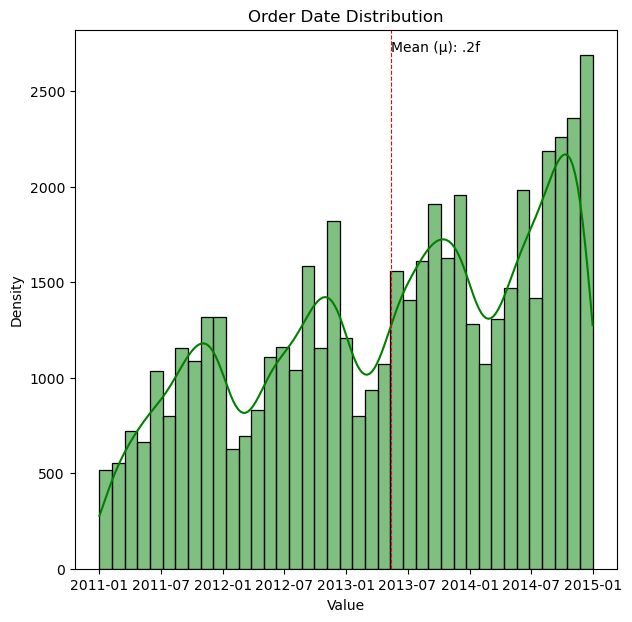

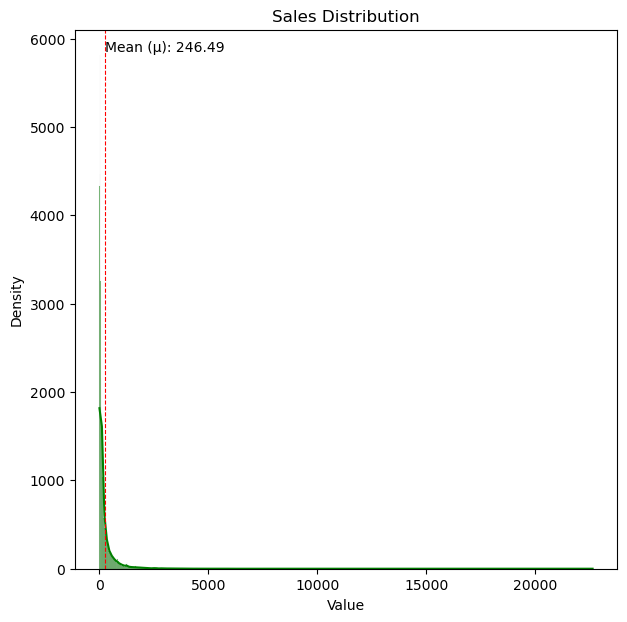

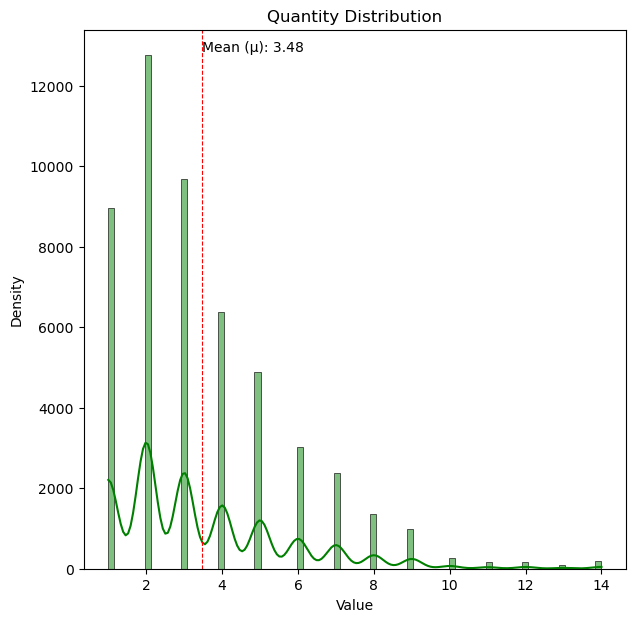

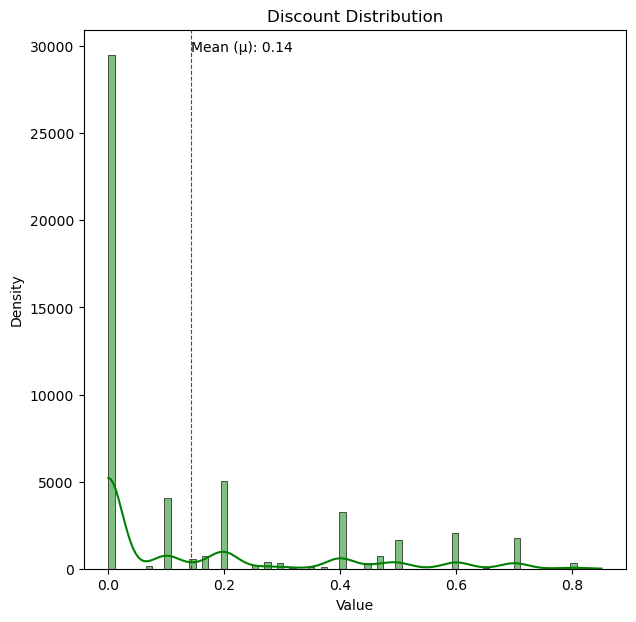

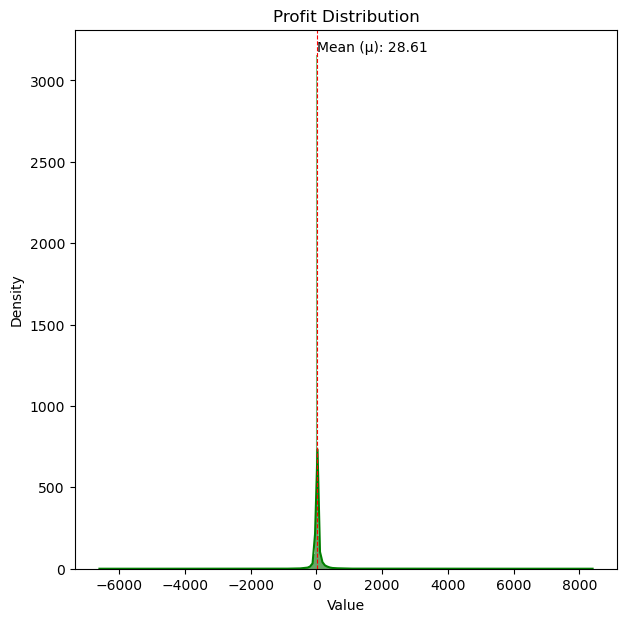

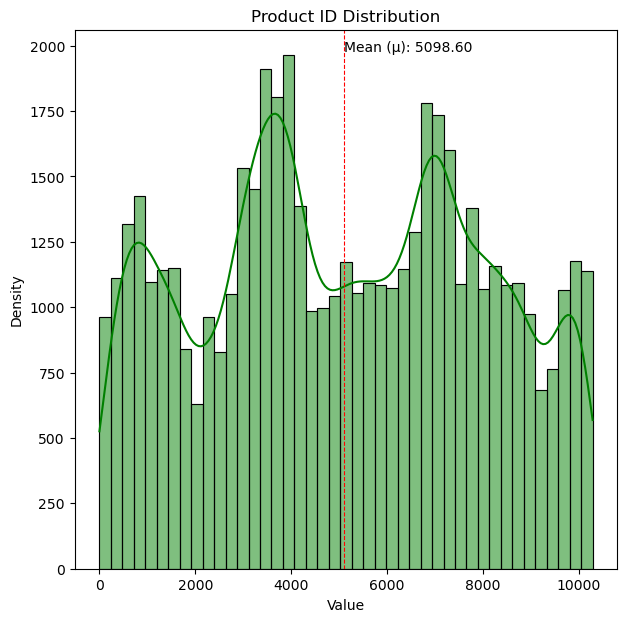

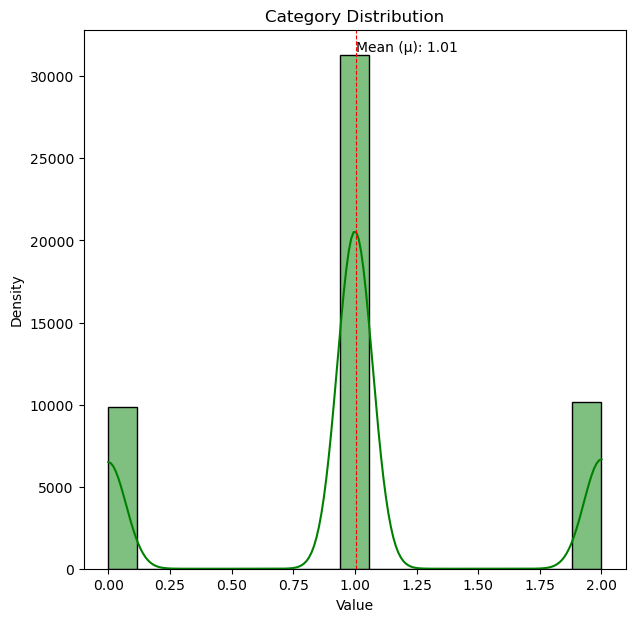

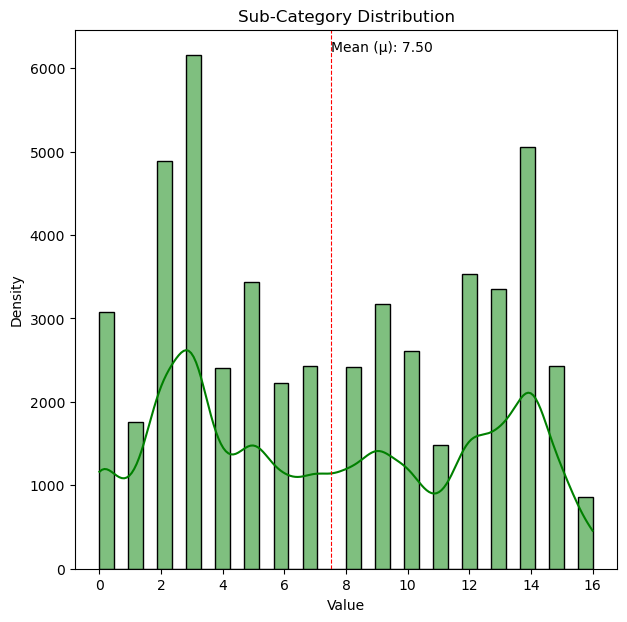

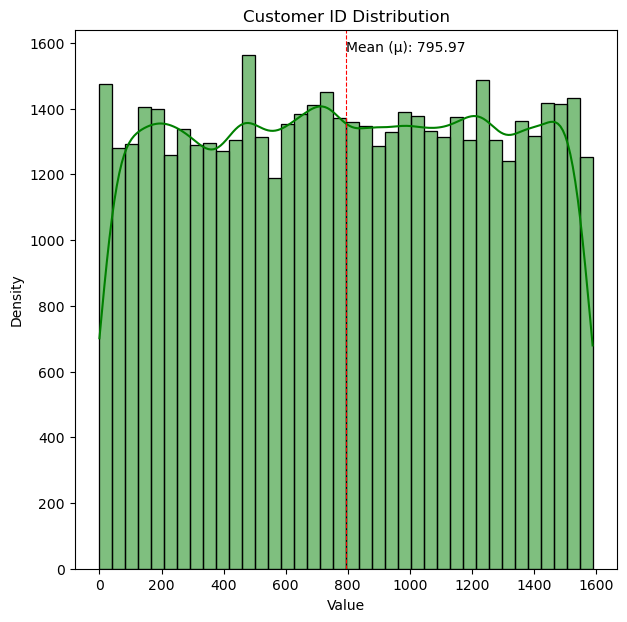

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

for column_name in Sales.columns:
    plt.figure(figsize=(7, 7))
    plt.title("{column_name} Distribution".format(column_name=column_name))
    sns.histplot(Sales[column_name], color='green', kde=True)
    plt.axvline(Sales[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
    min_ylim, max_ylim = plt.ylim()
    plt.text(Sales[column_name].mean(), max_ylim*0.96, 'Mean (μ): {:.2f}'.format(Sales[column_name].mean()))
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.show()


**Analysing top 10 Best selling Product According to Product ID which is Encoded**

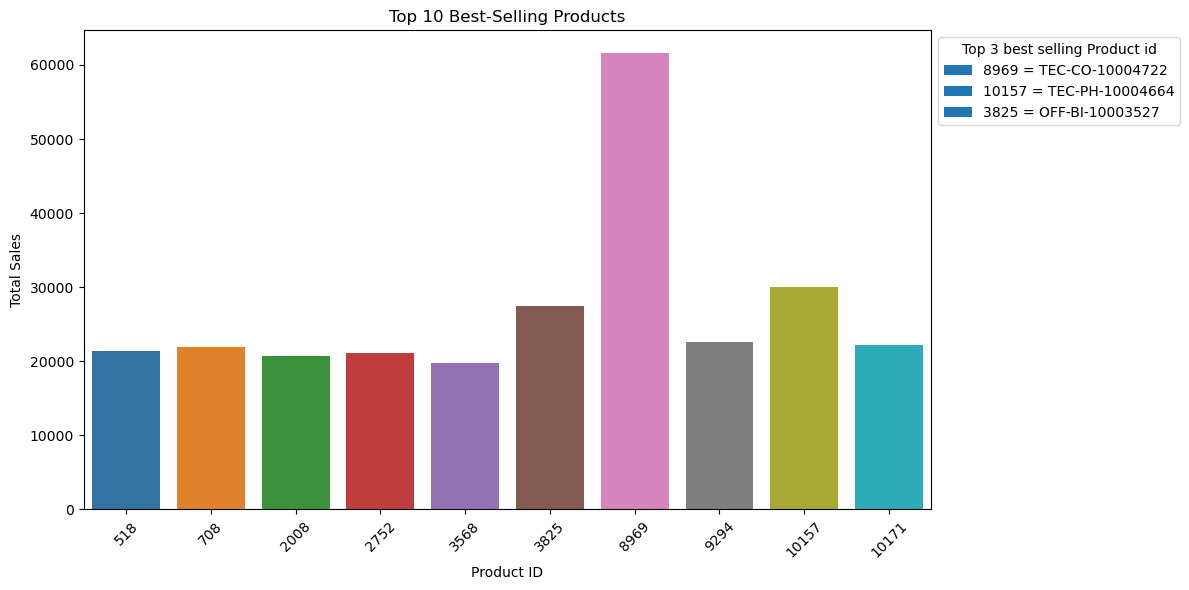

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

total_sales_per_product = Sales.groupby('Product ID')['Sales'].sum().reset_index()

# Step 2: Identify the Best-Selling Products
best_selling_products = total_sales_per_product.sort_values(by='Sales', ascending=False)

# Step 3: Build Visualizations
plt.figure(figsize=(12, 6))
sns.barplot(x='Product ID', y='Sales', data=best_selling_products.head(10))
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Custom Legend
legend_labels = {
    '8969': 'TEC-CO-10004722',
    '10157': 'TEC-PH-10004664',
    '3825': 'OFF-BI-10003527'
}

legend_patches = [mpatches.Patch(label=f'{key} = {value}') for key, value in legend_labels.items()]
plt.legend(handles=legend_patches, title='Top 3 best selling Product id', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


**Calculating the Total Number of Sale's by Every Product id Individually**

In [110]:
# Filter the DataFrame based on the 'Product ID' column
label = 3825
result = Sales[Sales['Product ID'] == label]


# Calculate the total number of sales
total_sales = result['Sales'].sum()

# Print the filtered DataFrame and the total number of sales 4722
print("Filtered DataFrame:")
print(result)
print("\nTotal Number of Sales:", total_sales)


Filtered DataFrame:
     Order Date     Sales  Quantity  Discount    Profit  Product ID  Category  \
8    2014-10-14  5083.960         5       0.2  1906.485        3825         1   
50   2012-06-16  3050.376         3       0.2  1143.891        3825         1   
76   2012-03-16  6354.950         5       0.0  3177.475        3825         1   
287  2013-11-16  1016.792         1       0.2   381.297        3825         1   
602  2014-11-20  1525.188         6       0.8 -2287.782        3825         1   
2181 2011-11-11  2033.584         2       0.2   762.594        3825         1   
2702 2013-01-31  1270.990         1       0.0   635.495        3825         1   
2888 2012-04-28  3812.970         3       0.0  1906.485        3825         1   
3356 2012-02-21  2541.980         2       0.0  1270.990        3825         1   
5412 2014-09-11   762.594         3       0.8 -1143.891        3825         1   

      Sub-Category  Customer ID  
8                3          822  
50               3  

**Analysing top Best selling Product According to Category of the product which is Encoded**

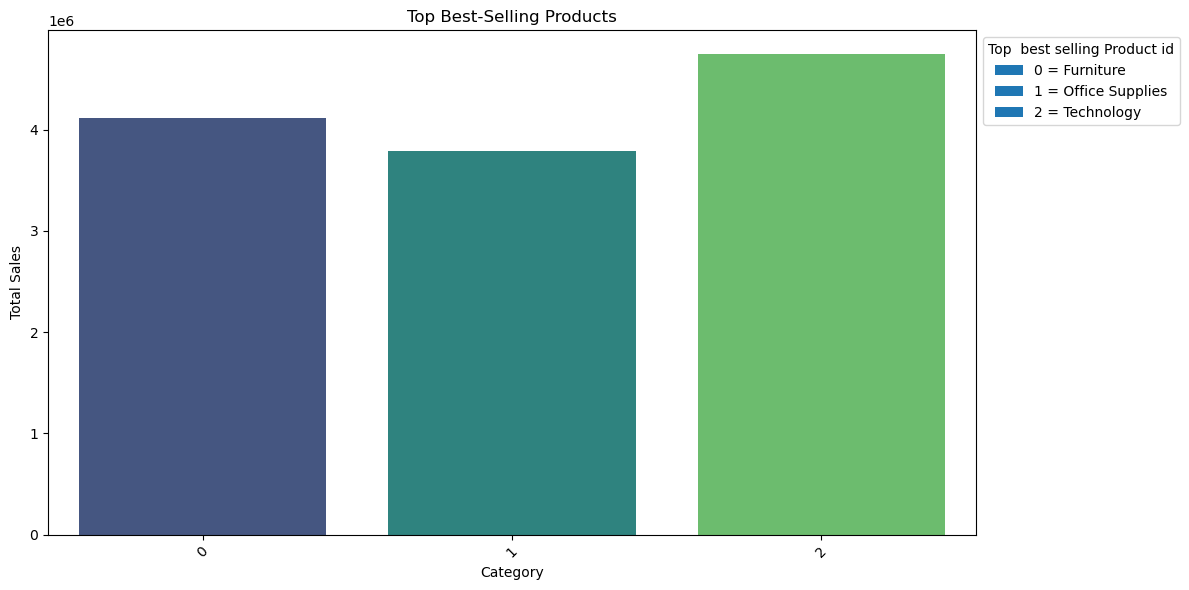

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Sales is your DataFrame
# Step 1: Calculate total sales for each product
product_sales = Sales.groupby('Category')['Sales'].sum().reset_index()

# Step 2: Identify the best-selling products
best_selling_products = product_sales.sort_values(by='Sales', ascending=False).head(10)

# Step 3: Build visualizations
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=best_selling_products, palette='viridis')
plt.title('Top Best-Selling Products')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
legend_labels = {
    '0': 'Furniture',
    '1': 'Office Supplies',
    '2': 'Technology'
}

legend_patches = [mpatches.Patch(label=f'{key} = {value}') for key, value in legend_labels.items()]
plt.legend(handles=legend_patches, title='Top  best selling Product id', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In [112]:
# Filter the DataFrame based on the 'Category' column
category_label = 2  
result = Sales[Sales['Category'] == category_label]

# Calculate the total number of sales
total_sales = result['Sales'].sum()

# Print the filtered DataFrame and the total number of sales
print("Filtered DataFrame:")
print(result)
print("\nTotal Number of Sales:", total_sales)


Filtered DataFrame:
      Order Date     Sales  Quantity  Discount    Profit  Product ID  \
0     2012-07-31  2309.650         7       0.0  762.1845        8246   
2     2013-10-17  5175.171         9       0.1  919.9710       10157   
3     2013-01-28  2892.510         5       0.1  -96.5400       10146   
4     2013-11-05  2832.960         8       0.0  311.5200       10249   
5     2013-06-28  2862.675         5       0.1  763.2750        9629   
...          ...       ...       ...       ...       ...         ...   
51151 2011-04-07    80.970         1       0.0   36.4200        9023   
51178 2014-01-02   173.460         1       0.0   50.2800        9534   
51219 2013-08-05   302.384         2       0.2   30.2384        9872   
51237 2014-06-11   279.960         5       0.2   17.4975        9833   
51259 2013-03-11    26.850         3       0.0    5.1015        8248   

       Category  Sub-Category  Customer ID  
0             2             0         1286  
2             2          